# Data Preparation

Prepare the data for machine learning algorithms.

- Data Cleaning (handling missing values)
- Handling Text and Categorical Features
- Feature Scaling
- Get Test Data


In [2]:
import numpy as np
import pandas as pd

housing = pd.read_csv('../data/housing.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Handling missing values

Most machine learning algorithms cannot work with missing values. We have three options to handle missing values.

1. We can **drop the rows** with missing values. We can do this using the function `dropna` provided by pandas. 

In [4]:
housing.dropna(subset=["total_bedrooms"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


2. We can **drop the columns** with missing values (if the features are not important). We can use the function `drop` to drop the features. 

In [5]:
housing.drop("total_bedrooms", axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


We can fill the missing values with some value such as zero, the mean, and the median. The following code fills the missing values with the median value using the function `fillna`. 

In [6]:
median = housing['total_bedrooms'].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Handling Text and Categorical Features



In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The feature **ocean_proximity** is a text categorical feature. It has five categories. 
Most machine learning algorithms prefer to work with numbers, so let's conver these categories from text to numbers. For this we can use skit-learn's `OrdinalEncoder` class. 

In [8]:
housing_cat = housing[["ocean_proximity"]] # we take out data of all the categorical features
housing_cat.shape

(20640, 1)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
np.unique(housing_cat_encoded, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([9136, 6551,    5, 2290, 2658]))

`OrdinalEncoder` tranfers text to integers from 0 to 4. You can check their corresponding categories by `categories_`

In [10]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that machine learning algorithm will assume that two nearby values are more similar than two distant values. This may be fine in some cases, for example for ordered categories such as "bad", "averag", "good" and "excellent", but it does not make scense for the feature **ocean_proximity** -- there is no obvious ordering relation between the categories. To fix this issue, we can use *one-hot encoding*. Skit-learn provides the `OneHotEncoder` class for this encoding. 

In [11]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_encoded = one_hot_encoder.fit_transform(housing_cat)
housing_cat_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Feature Scaling

- Standardisation
    - mean = 0 and standard deviation = 1
- Nomalisation (min-max scaling)
    - shifts and recales values to [0, 1]
    - $x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$

In [12]:
# drop the categorical feature and the label feature
X = housing.drop("ocean_proximity", axis=1).drop("median_house_value", axis=1).to_numpy()

N, D = X.shape
Ntrain = int(0.8 * N)
shuffler = np.random.permutation(N)
Xtrain = X[shuffler[:Ntrain]]
Xtest = X[shuffler[Ntrain:]]

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(Xtrain)
scaler.transform(Xtrain)
scaler.transform(Xtest)


array([[0.47908367, 0.44208289, 0.37254902, ..., 0.05818717, 0.058543  ,
        0.12033627],
       [0.20916335, 0.59723698, 0.31372549, ..., 0.06333368, 0.14586417,
        0.16810803],
       [0.20916335, 0.52391073, 0.7254902 , ..., 0.00917271, 0.01677356,
        0.34267803],
       ...,
       [0.19322709, 0.55260361, 0.82352941, ..., 0.03262963, 0.05492518,
        0.25208618],
       [0.58864542, 0.17428268, 0.62745098, ..., 0.03686588, 0.06413419,
        0.26724459],
       [0.21414343, 0.5674814 , 0.68627451, ..., 0.01382908, 0.02532478,
        0.50162756]])

#### Normalization vs Standardization — Quantitative analysis

Unfortunately, there is not a clear answer which scaler is better than other scalers. It depends on the application and the data. Check the blog for more information: https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

### Get Test Data

We have seen how to split the data to get the training and test data in the last practical session. We shuffle the data, and then take 20% of the data as the test data and the remaining as the training data. 
We want to talk about two issues when you get the test data. 

The first one is that always get different test data when we run the program. This might be a problem as over time, you or your machine learning algorithms will get to see the whole dataset, which is what you want to avoid. 

We can solve the problem by setting the random seed, to make sure we so that np.random always generates the same random indices. 

In [14]:
X = housing.drop("median_house_value", axis=1).to_numpy()
y = housing["median_house_value"].to_numpy()

N, D = X.shape
Ntrain = int(0.8 * N)
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(N)
Xtrain = X[shuffled_indices[:Ntrain]]
ytrain = y[shuffled_indices[:Ntrain]]
Xtest = X[shuffled_indices[Ntrain:]]
ytest = y[shuffled_indices[Ntrain:]]

In [15]:
# by setting the random seed to the same number, the np.random will generate the same result
np.random.seed(42)
print(np.random.permutation(20))
np.random.seed(42)
print(np.random.permutation(20))

[ 0 17 15  1  8  5 11  3 18 16 13  2  9 19  4 12  7 10 14  6]
[ 0 17 15  1  8  5 11  3 18 16 13  2  9 19  4 12  7 10 14  6]


We can also use the function `train_test_split` provided by skit-learn. By setting the parameter `random_state`, the function will split the data in the same way every time. 

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

The second issue is that so far we have considered purely random sampling methods. This is generally find if the dataset is large, but if it is not, we run the risk of introducing sampling bias. When a survey company decides to call 1000 people to ask them a few questions, they don't just pick 1000 people randomly. They try to ensure that these 1000 people are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This called **stratified sampling**: the population is divided into categories, and the right number of instances are sampled from each category to guarantee that the test data is representative of the overall population. 

Since the feature **median_income** is the most correlated feature with the label feature, we want to ensure that the test dataset is representative of the various categories of incomes in the whole dataset. 
Since **median_income** is a continuous numerical feature, we need to create an income category feature.

Let's first have a look at the distribution of the median income. 

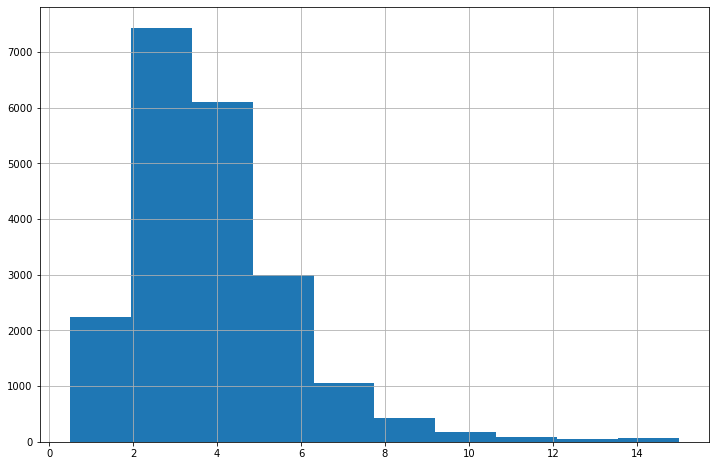

In [17]:
housing['median_income'].hist(figsize=(12,8))

Most values are clustered around 1.5 to 6, but some median incomes go far beyond 6. It is important to have a sufficient number of instances for each category, so we create the following categories: [0,1.5), [1.5,3.0), [3.0,4.5), [4.5,6.0), and [6.0, $\infty$).

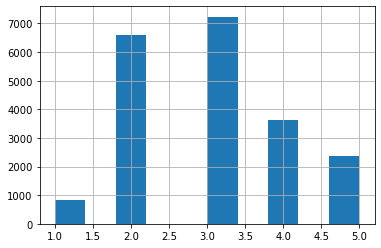

In [18]:
housing["income_cat"] = pd.cut(housing['median_income'], bins=[0,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()

We are now ready to do stratified sampling based on the income category. We can use the `StratifiedShuffleSplit` class provided by skit-learn. You can see that the **income_cat** values have similar distribution in both training and test data.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, housing["income_cat"]):

    print("TRAIN:", train_index, "TEST:", test_index)
    housing_train = housing.loc[train_index]
    housing_test = housing.loc[test_index]

    # check the distribution of income_cat values in both training and test data
    print(housing_train["income_cat"].value_counts() / len(housing_train))
    print(housing_test["income_cat"].value_counts() / len(housing_test))

TRAIN: [17606 18632 14650 ... 13908 11159 15775] TEST: [ 5241 10970 20351 ...  4019 12107  2398]
3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
